In [161]:
import pandas as pd
import numpy as np

## Load the Data

In [162]:
titanic = pd.read_csv('./data/Titanic_dataset.csv')

In [163]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [164]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [165]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Processing

In [166]:
c_titanic = titanic.copy()

In [167]:
c_titanic = c_titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [168]:
c_titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
...,...,...,...,...,...
413,0,3,male,NaN,8.0500
414,1,1,female,39.0,108.9000
415,0,3,male,38.5,7.2500
416,0,3,male,NaN,8.0500


## Missing values handling

In [169]:
def missing_values_proportion(df):
    cols = df.columns
    for col in cols:
        proportion = df[col].isnull().sum()/df.shape[0]
        print(f'proportion of missing value for {col} is {proportion*100:.2f}')

In [170]:
missing_values_proportion(c_titanic)
print(f'\nnb of rows {c_titanic.shape[0]}')

proportion of missing value for Survived is 0.00
proportion of missing value for Pclass is 0.00
proportion of missing value for Sex is 0.00
proportion of missing value for Age is 20.57
proportion of missing value for Fare is 0.24

nb of rows 418


In [171]:
c_titanic.fillna(c_titanic.select_dtypes(include='number').mean(), inplace=True)

In [172]:
missing_values_proportion(c_titanic)
print(f'\nnb of rows {c_titanic.shape[0]}')

proportion of missing value for Survived is 0.00
proportion of missing value for Pclass is 0.00
proportion of missing value for Sex is 0.00
proportion of missing value for Age is 0.00
proportion of missing value for Fare is 0.00

nb of rows 418


## Label Encoding

In [173]:
en_titanic = c_titanic.copy()

In [174]:
en_titanic['Sex'] = en_titanic['Sex'].apply(
    lambda x: 1 if x == 'male' else 0 if x == 'female' else 0
)

In [175]:
en_titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.50000,7.8292
1,1,3,0,47.00000,7.0000
2,0,2,1,62.00000,9.6875
3,0,3,1,27.00000,8.6625
4,1,3,0,22.00000,12.2875
...,...,...,...,...,...
413,0,3,1,30.27259,8.0500
414,1,1,0,39.00000,108.9000
415,0,3,1,38.50000,7.2500
416,0,3,1,30.27259,8.0500


## Decision Tree Model

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(criterion='entropy')

In [177]:
X = en_titanic.drop('Survived', axis=1)
y = en_titanic['Survived']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
len(X_train), len(X_test), len(y_train), len(y_test)

(334, 84, 334, 84)

In [180]:
DTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [181]:
DTree.score(X_test, y_test)

1.0

## Cross Validation

In [182]:
from sklearn.model_selection import cross_val_score, KFold

cross_val = cross_val_score(DTree, X, y, cv=5)

In [183]:
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(DTree, X, y, cv=kf)

In [184]:
print("Cross-Validation Scores for each fold:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

Cross-Validation Scores for each fold:
Fold 1: 1.00
Fold 2: 1.00
Fold 3: 1.00
Fold 4: 1.00
Fold 5: 1.00


In [185]:
avg = np.mean(cv_scores)
print(f"Average Cross-Validation Score: {avg:.2f}")

Average Cross-Validation Score: 1.00


## Confusion Matrix

In [186]:
predictions = DTree.predict(X)

In [188]:
en_titanic['Prediction'] = predictions

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(en_titanic['Survived'], predictions)

In [191]:
cm

array([[266,   0],
       [  0, 152]], dtype=int64)

In [194]:
cm_display = ConfusionMatrixDisplay(cm,display_labels=['Not Survived','Survived'])

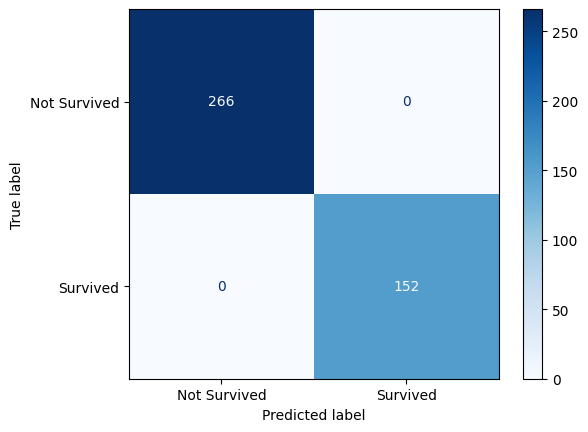

In [195]:
import matplotlib.pyplot as plt

cm_display.plot(cmap=plt.cm.Blues)
plt.show()